In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Jackson DaPuzzo

Student ID: 500536

Collaborators: Ryan Padala


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). However, **do not install and use other packages from what we have set up in our cse217a conda environment!**

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from utility.util import configure_plots

file = "utility/data/rideshare_kaggle.csv"
data = pd.read_csv(file)
data.iloc[:,:]
#data.columns
# data['surge_multiplier'].unique()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


The data comes from Boston, Massachussetts. The data was obtained by Uber and Lyft from the dates of November 25, 2018, to December 18, 2018. The dataset has 693,071 examples/observations, and 57 different features. Some notable features are whether it is an Uber or a Lyft, what type of ride it is(UberX, UberXL, Shared, etc.),date and time of the ride, the surge multiplier, the price of the ride, and a large amount of features describing the weather at the time of the ride, and on the day of the ride. These values can take decimal/float values(26), integer values(17), string values (10), or other (4). This data is very specific in some ways, such as the time of the ride being down to the second, but also very general in other ways, such as the price being in increments of .5. These discrepencies in accuracy will be important to be aware of as we go through the project.

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

My first step in cleaning the data is to remove many features that I find irrelevant to anything that I may be exploring in the data. This includes all of the weather data, and most of the data about the types of cars and locations. I will remove those features and leave myself with just data I find interesting for potential further exploration.

In [4]:
# here i create a new dataframe that just contains the features that I am potentially interested in analyzing
new_data = data[['hour','datetime','cab_type','name','price','distance','surge_multiplier']]
new_data

,hour,datetime,cab_type,name,price,distance,surge_multiplier
0,9,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,1.0
1,2,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,1.0
2,1,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,1.0
3,4,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693066,23,2018-12-01 23:53:05,Uber,UberXL,13.0,1.00,1.0
693067,23,2018-12-01 23:53:05,Uber,UberX,9.5,1.00,1.0
693068,23,2018-12-01 23:53:05,Uber,Taxi,NaN,1.00,1.0
693069,23,2018-12-01 23:53:05,Uber,Black SUV,27.0,1.00,1.0


Now that I have consolidated my data to just 7 features that I could possibly be interested in, I am going to remove any observations that contain no value for any of my features. The reason I am doing this is that having that in my data will cause any calculations or summary statistics to be inaccurate. I will do this using the pandas dropna() method.

In [5]:
new_data = new_data.dropna()
new_data

,hour,datetime,cab_type,name,price,distance,surge_multiplier
0,9,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,1.0
1,2,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,1.0
2,1,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,1.0
3,4,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693065,23,2018-12-01 23:53:05,Uber,WAV,9.5,1.00,1.0
693066,23,2018-12-01 23:53:05,Uber,UberXL,13.0,1.00,1.0
693067,23,2018-12-01 23:53:05,Uber,UberX,9.5,1.00,1.0
693069,23,2018-12-01 23:53:05,Uber,Black SUV,27.0,1.00,1.0


The result of the dropna() method was we decreased the amount of observations in our dataframe by 55,095. Given that we started with nearly 700,000 observations, losing this many is not necessarily an issue. We can now analyze the data using only complete observations. Next, I am going to turn the 'datetime' feature into the datetime type so it can be more easily used.

In [6]:
new_data['datetime'] = pd.to_datetime(new_data['datetime'])
new_data.dtypes

/var/folders/hq/34kq2szx2rlfyryn1d1_m32m0000gn/T/ipykernel_43006/1565172943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['datetime'] = pd.to_datetime(new_data['datetime'])


hour                         int64
datetime            datetime64[ns]
cab_type                    object
name                        object
price                      float64
distance                   float64
surge_multiplier           float64
dtype: object

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

I am first going to look at the distribution of the surge multiplier value. In order to do this, I will first find out how many different values there are to see how many bins I should have.

In [7]:
new_data['surge_multiplier'].unique()
# I can see from the output of this cell that there are 7 possible unique values that surge_multiplier can take.

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

Text(0.5, 0, 'Surge Multiplier')

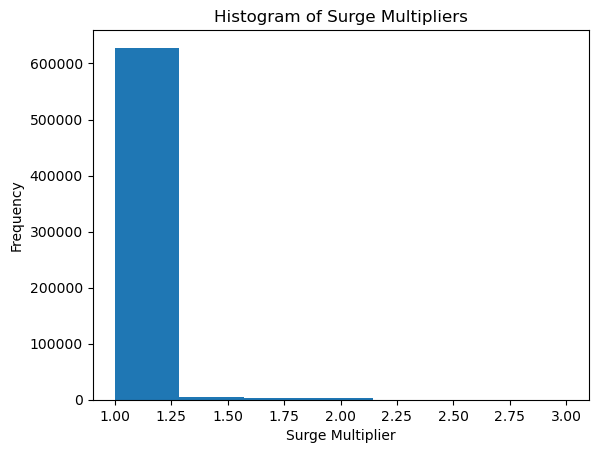

In [8]:
plt.hist(new_data['surge_multiplier'], bins = 7)
plt.title("Histogram of Surge Multipliers")
plt.ylabel("Frequency")
plt.xlabel("Surge Multiplier")

As seen in the histogram above, there is a very skewed distribution of the surge multipliers. So much so that it seems as if I would not have enought data on the higher surge multipliers to make quality analyses. As a result, I will probably not end up using the surge multiplier in my rigorous analysis.

Text(0.5, 0, 'Ride Distance')

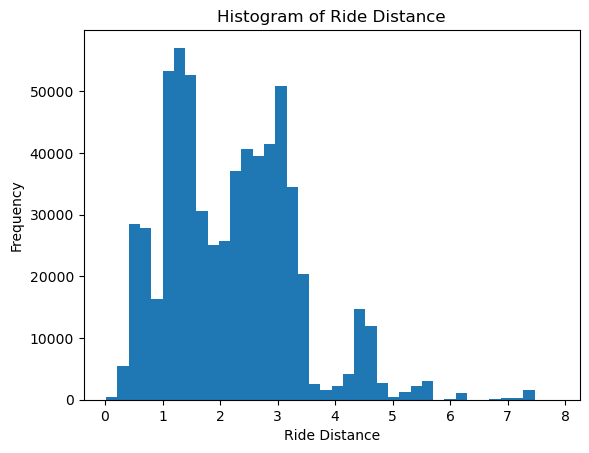

In [9]:
# Next, I will look at the distribution of the distance of our rides. Distance varies more, so I'll use 40 bins.
plt.hist(new_data['distance'], bins = 40)
plt.title("Histogram of Ride Distance")
plt.ylabel("Frequency")
plt.xlabel("Ride Distance")

I can see here that the distribution of the data for distance is right-skewed. Now I will take a look at some of the summary statistics for distance.

In [10]:
new_data.distance.describe()
#This will give me another look into how this data is distributed

count    637976.000000
mean          2.189261
std           1.135413
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64

Next I will take a look at a histogram for the price of rides.

Text(0.5, 0, 'Ride Price')

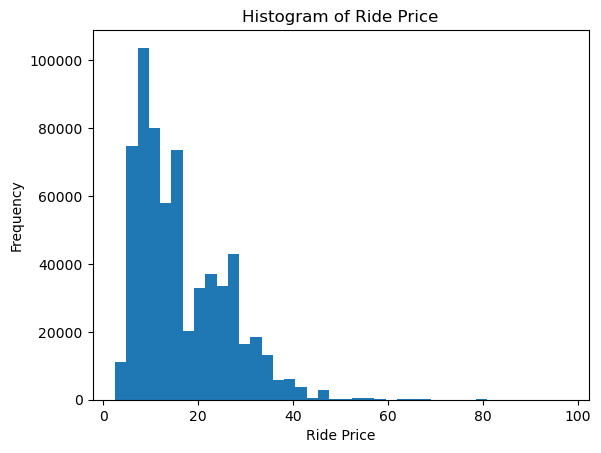

In [11]:
plt.hist(new_data['price'], bins = 40)
plt.title("Histogram of Ride Price")
plt.ylabel("Frequency")
plt.xlabel("Ride Price")

Similarly to distance, price is pretty right-skewed. It seems that price however, might have an outlier making it's range proportionately larger than distance.  I will find our summary statistics of price to compare.

In [12]:
new_data.price.describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

By adding 1.5*IQR to our 75th percentile, we get 42.75, showing that we do indeed have multiple significant outliers in our price data, that could be skewing the summary statistics. This leads me to believe that there could be a correlation between distance and price. Next, I will check out a scatterplot of price vs distance.

Text(0, 0.5, 'Price')

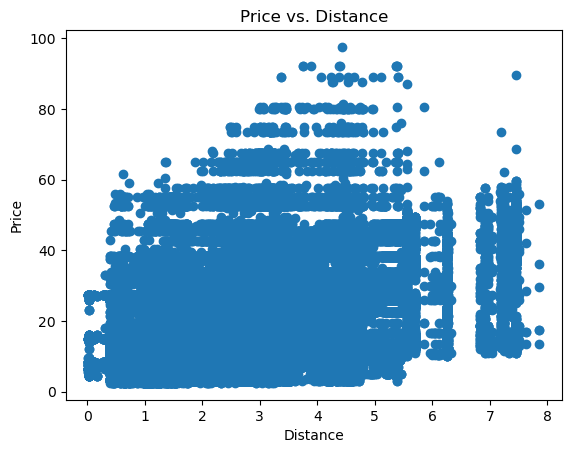

In [13]:
plt.scatter(new_data['distance'],new_data['price'])
plt.title('Price vs. Distance')
plt.xlabel("Distance")
plt.ylabel('Price')

This plot is very interesting. There are some weird empty spaces, and other super populated areas. It is definitely possible to see some sort of positive correlation between price and distance, but there is definitely something missing. I am now going to take a look at the distribution of the names saying what version of each cab it is.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

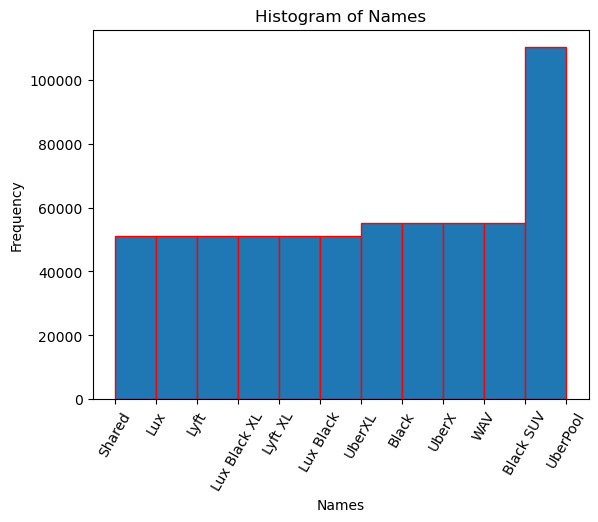

In [14]:
plt.hist(new_data['name'], bins = new_data['name'].unique(), edgecolor = 'red')
plt.title("Histogram of Names")
plt.ylabel("Frequency")
plt.xlabel("Names")
plt.xticks(rotation = 60)

Now I would like to see the relationship between car name and price, since each car has different amenities.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

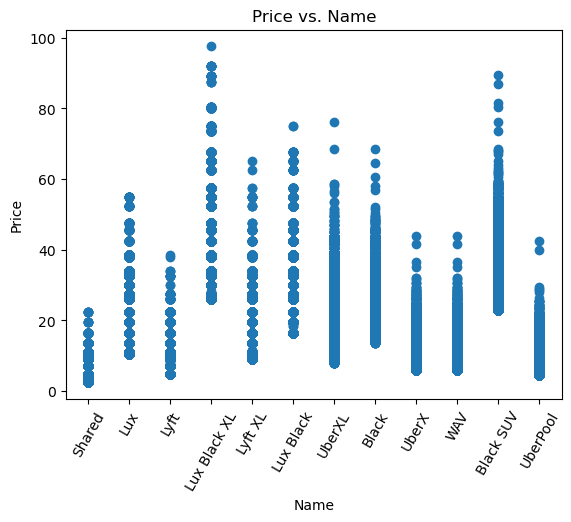

In [15]:
plt.scatter(new_data['name'],new_data['price'])
plt.title('Price vs. Name')
plt.xlabel("Name")
plt.ylabel('Price')
plt.xticks(rotation = 60)

It can  be seen that there is a correlation between car name and price. This would make sense given these cars are of different quality in many ways. Next, I will take a look at how the time of day of rides is distributed.

Text(0.5, 0, 'Time of Ride')

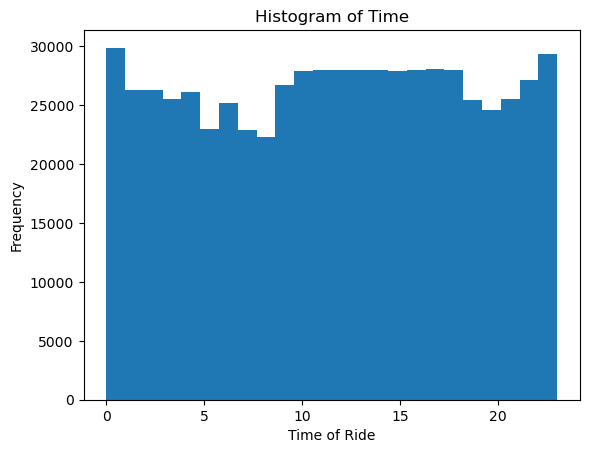

In [16]:
plt.hist(new_data['hour'], bins = 24)
plt.title("Histogram of Time")
plt.ylabel("Frequency")
plt.xlabel("Time of Ride")

Here we can see that rides are most frequent arount midnight-1AM, and noon-6PM. Given this data, I am curious to see how the demand at different times impacts the price. I will now make a scatterplot of time and price to look into this.

Text(0, 0.5, 'Price')

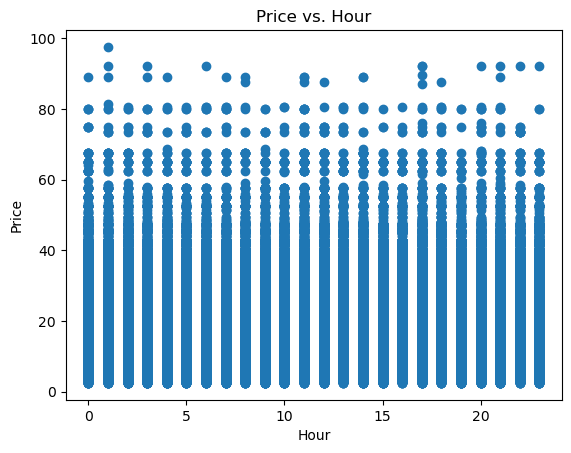

In [17]:
plt.scatter(new_data['hour'],new_data['price'])
plt.title('Price vs. Hour')
plt.xlabel("Hour")
plt.ylabel('Price')
# plt.xticks(rotation = 60)

From this scatterplot, it is difficult to tell whether there is a correlation between time and price. In order to analyze whether or not the means of the prices for each hour vary, I will create a seaborn barplot.

<AxesSubplot:xlabel='hour', ylabel='price'>

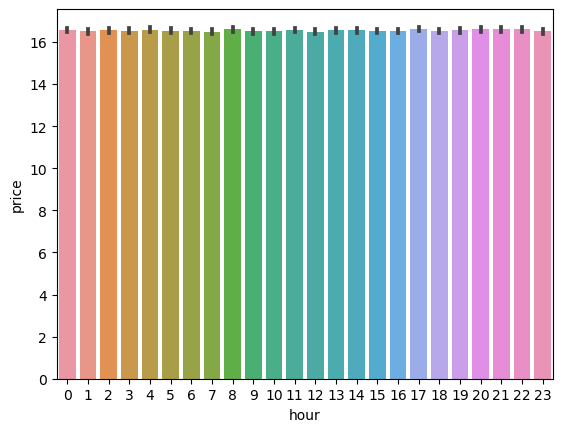

In [18]:
sns.barplot(data = new_data, x = "hour", y = "price")

As seen above, the mean price for each hour are essentially identical. Therefore, I can conclude that there is virtually no correlation between time of day and price of rides. 

 If I were to do a multiple linear regression with two features, distance and car type, I would not expect the model to encounter any multicollinearity between our two variables, because it doesn't seem likely that distance and name have much of a relationship. However, to be sure, I will check below.

Text(0, 0.5, 'Name')

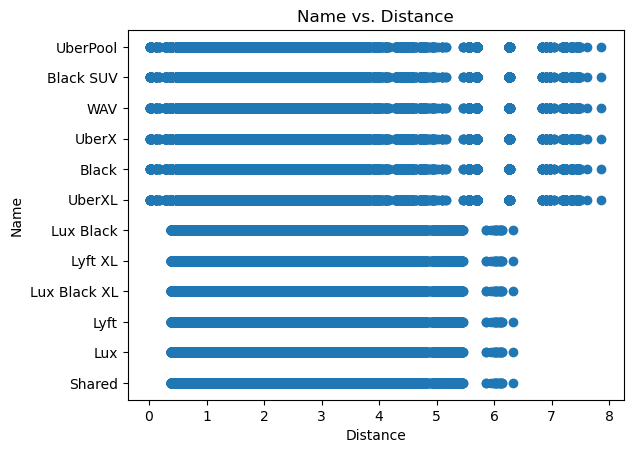

In [19]:
plt.scatter(new_data['distance'],new_data['name'])
plt.title('Name vs. Distance')
plt.xlabel("Distance")
plt.ylabel('Name')

<AxesSubplot:xlabel='distance', ylabel='name'>

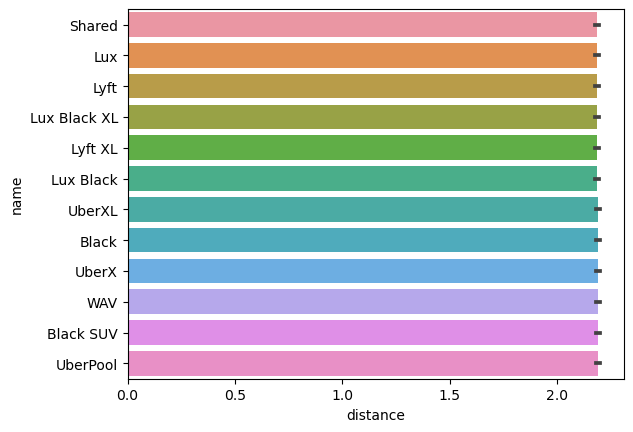

In [20]:
sns.barplot(data = new_data, x = "distance", y = "name")

As can be seen, there is no multicollinearity between the two variables, so I do not have to worry about that, if I were to perform a mulitple linear regression. 

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

What I found interesting in my data was how there seems to be at least somewhat of a correlation between price and distance. Although the correlations from my scatterplot between distance and price is not perfect, I hypothesize that we can create a model that can somewhat accurately predict the price of an Uber/Lyft based on the distance of the trip. 

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

Below we are going to perform a simple linear regression model. We will need to turn the 1D array of distances into a 2D array so that we can perform the regression.  We will also calculate the r_squared for the model to evaluate our model.


In [21]:
def r_squared(predictions, labels):
    '''computes the r-squared metric of a model given some PREDICTIONS and their true LABELS'''
    numerator = np.mean((labels - predictions)**2)
    denominator = np.mean((labels - np.mean(labels))**2)
    r2 = 1 - (numerator/denominator)
    
    return r2

Text(0, 0.5, 'Price')

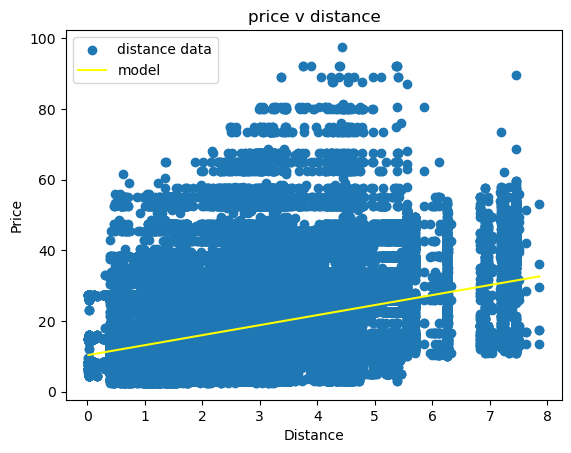

In [22]:

x=new_data['distance'].to_numpy()
y=new_data['price']

reshape = lambda x: x.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(reshape(x), y)

x_star = np.linspace(x.min(), x.max(), 1000)
y_star = linear_model.predict(reshape(x_star))

plt.scatter(x,y)
plt.plot(x_star, y_star, color='yellow')

plt.legend(['distance data','model'])
plt.title('price v distance')
plt.xlabel("Distance")
plt.ylabel('Price')


Now we are going to make a polynomial model that could have a better r_squared and fit the data better. Regardless, it does appear that there is a postive correlation between distance and price. 

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def make_poly(x, y, degree=2):
    '''creates and returns a polynomial regression model fit with input data X and Y'''
    
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_model = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", LinearRegression())])

    return poly_model.fit(reshape(x), y)

0.12136087926250216

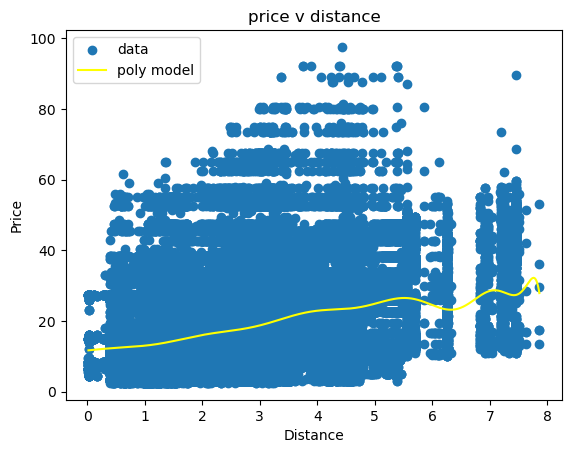

In [24]:
#poly_best_model = make_poly(x, y, 1) #r^2 .11906
#poly_best_model = make_poly(x, y, 5) #r^2 .12063
#poly_best_model = make_poly(x, y, 10) #r^2 .12090
#poly_best_model = make_poly(x, y, 15) #r^2 .12134
poly_best_model = make_poly(x, y, 17) #r^2 .12136
#poly_best_model = make_poly(x, y, 20) #r^2 .12088




x_poly = np.linspace(x.min(), x.max(), 1000)
y_plot = poly_best_model.predict(reshape(x_star))

plt.scatter(x,y)
plt.plot(x_poly, y_plot, color='yellow')

plt.legend(['data','poly model'])
plt.title('price v distance')
plt.xlabel("Distance")
plt.ylabel('Price')

y_poly = poly_best_model.predict(reshape(x))
r_squared(y_poly, y)

After running a polynomial regression, it was determined that the 17th degree was the best for the model. However, that being said, it only had an r_squared of .12136 and was marginally better than the others. Having such a high degree could also end up leading to a model that is overfitted.

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

After running the regression and looking at the data provided as a means to answer our hypothesis, it seems that we will not be able to accuratly predict the price given the distance. Even looking at the scatter plot, there are way too many prices each distance, preventing us from accurately predicting a price from a distance. We can determine, however, that there is a postive correlation between distance and price, with the price increasing as the distance increases as well. Perhaps it would have been better to run a multiple regression with more features. However, that would involve enumerating all of our data and using the same data like distance which is hard to use as it is all over the place. It would have been nice if the data for distance had a more clear trend and was less uniform around the smaller distances. I think it just means that the change in price for smaller distances is marginal and less significant and might rely on other factors too. Unfortunately the data provided only has a max distance around 7 miles and was extremely skewed to the right. I hypothesize that a potentially better method for predicting price would be the total time that a trip takes, since this would be a better indicator of the costs incurred in completing the trip (i.e a 2 hour 2 mile ride should be more expensive than a 10 minute 4 mile ride). It is because of all of this that the r sqaured is low, showing that the model is not great. Despite this, we can still tell that there is a postive correlation though not significant.

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

There are not necessarily any shortcomings or ethical issues related to the way I used this data, because the data of price and distance for these uber rides are totally independent of any traits that may be discriminatory or biased. The stakeholders of this data are anybody with interest into data on Uber/Lyft, Uber/Lyft drivers, or the companies themself. There is not really anybody that could be impacted by any ethical issues arising from my analysis.

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

Some examples of data that were not useful was surge multiplier (it was almost exclusivley one value so it did not provide any information), and a lot of the weather information. Some weather information can be useful (i.e. drizziling, pouring, sunny, windy, snowing, and how cold), but the other weather information that was provided seemed irrelevant or diffcult to manage for the project. Looking back, it would have been interesting to see how many cars were near the area at the time of the order and how many other orders were done around the same time. Perhaps that is what the surge multiplier tells, but regardless it would be nice to have more specific data on that.

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

In [25]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [26]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [27]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)